In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# File to Load
file_to_load = "merged_data.csv"

# Read CSV File and store into Pandas data frame
anx_data = pd.read_csv(file_to_load)
anx_data.head()

,Unnamed: 0,date,state,cases,deaths,mental disorder,frequency of mental disorder
0,0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6
1,1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6
2,2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3
3,3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2
4,4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7


In [3]:
depression_df = anx_data[anx_data['mental disorder']=='Symptoms of Depressive Disorder']
anxiety_df = anx_data[anx_data['mental disorder']== 'Symptoms of Anxiety Disorder']
either_df = anx_data[anx_data['mental disorder']== 'Symptoms of Anxiety Disorder or Depressive Disorder']

depression = depression_df.groupby('state').mean()['frequency of mental disorder']
anxiety = anxiety_df.groupby('state').mean()['frequency of mental disorder']
either = either_df.groupby('state').mean()['frequency of mental disorder']
both = (depression+anxiety)-either

In [4]:
mean_cases = anx_data.groupby('state').mean()["cases"]
mean_deaths = anx_data.groupby('state').mean()["deaths"]
mean_mental_disorder=anx_data.groupby('state').mean()["frequency of mental disorder"]
mean_mental_disorder

summary_stats_df = pd.DataFrame({"Cases": mean_cases, "Deaths":mean_deaths, "Anxiety":anxiety, "Depression":depression,
                                "Either Disorder":either, "Both Disorders":both})
summary_stats_df.head()

,Cases,Deaths,Anxiety,Depression,Either Disorder,Both Disorders
state,,,,,,
Alabama,1.739869e+05,3081.555556,32.307407,27.696296,37.485185,22.518519
Alaska,1.789378e+04,86.259259,31.914815,25.685185,37.314815,20.285185
Arizona,2.708545e+05,5512.000000,33.581481,27.933333,38.966667,22.548148
Arkansas,1.061795e+05,1719.148148,34.448148,28.896296,39.629630,23.714815
California,1.112002e+06,17291.148148,35.185185,28.518519,40.777778,22.925926


In [5]:
print('The total number of cases is '+str(round(summary_stats_df['Cases'].sum(),0))+'.')
print('The total number of deaths is '+str(round(summary_stats_df['Deaths'].sum(),2))+'.')
print('The average rate of anxiety is '+str(round(summary_stats_df['Anxiety'].mean(),2))+'.')
print('The averange rate of depression is '+str(round(summary_stats_df['Depression'].mean(),2))+'.')
print('The average rate of anxiety or depression symptoms '+str(round(summary_stats_df['Either Disorder'].mean(),2))+'.')
print('The average rate for both anxiety and depression symptoms is '+str(round(summary_stats_df['Both Disorders'].mean(),2))+'.')


The total number of cases is 9762136.0.
The total number of deaths is 222811.78.
The average rate of anxiety is 32.08.
The averange rate of depression is 25.63.
The average rate of anxiety or depression symptoms 36.98.
The average rate for both anxiety and depression symptoms is 20.72.


In [6]:
summary_stats_df.reset_index(inplace=True)
summary_stats_df["state"]

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

          state          Cases        Deaths    Anxiety  Depression  \
42    Tennessee  253641.740741   3404.703704  32.896296   27.174074   
13     Illinois  443956.703704  10606.518519  32.925926   26.277778   
49    Wisconsin  212937.814815   2400.481481  28.148148   22.244444   
24  Mississippi  107451.629630   2767.629630  35.481481   31.129630   
0       Alabama  173986.925926   3081.555556  32.307407   27.696296   
30   New Jersey  311223.296296  15704.000000  33.092593   25.307407   
9       Florida  696438.518519  12442.814815  33.870370   27.659259   
23    Minnesota  168347.629630   2726.444444  28.148148   20.955556   
17     Kentucky  122408.814815   1630.555556  33.988889   28.251852   
47   Washington  120976.777778   2326.259259  33.648148   26.448148   

    Either Disorder  Both Disorders  
42        37.825926       22.244444  
13        38.077778       21.125926  
49        32.385185       18.007407  
24        41.751852       24.859259  
0         37.485185       22

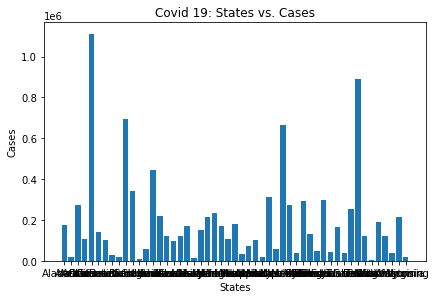

In [7]:
sample_df = summary_stats_df.sample(n=10, random_state=2)
print(sample_df)
x_axis=summary_stats_df["state"]
y_axis=summary_stats_df["Cases"]
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.title("Covid 19: States vs. Cases")
plt.xlabel("States")
plt.ylabel("Cases")
plt.show()

          state          Cases        Deaths    Anxiety  Depression  \
42    Tennessee  253641.740741   3404.703704  32.896296   27.174074   
13     Illinois  443956.703704  10606.518519  32.925926   26.277778   
49    Wisconsin  212937.814815   2400.481481  28.148148   22.244444   
24  Mississippi  107451.629630   2767.629630  35.481481   31.129630   
0       Alabama  173986.925926   3081.555556  32.307407   27.696296   
30   New Jersey  311223.296296  15704.000000  33.092593   25.307407   
9       Florida  696438.518519  12442.814815  33.870370   27.659259   
23    Minnesota  168347.629630   2726.444444  28.148148   20.955556   
17     Kentucky  122408.814815   1630.555556  33.988889   28.251852   
47   Washington  120976.777778   2326.259259  33.648148   26.448148   

    Either Disorder  Both Disorders  
42        37.825926       22.244444  
13        38.077778       21.125926  
49        32.385185       18.007407  
24        41.751852       24.859259  
0         37.485185       22

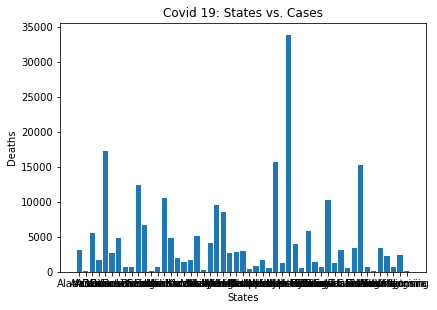

In [8]:
sample_df = summary_stats_df.sample(n=10, random_state=2)
print(sample_df)
x_axis=summary_stats_df["state"]
y_axis=summary_stats_df["Deaths"]
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.title("Covid 19: States vs. Cases")
plt.xlabel("States")
plt.ylabel("Deaths")
plt.show()

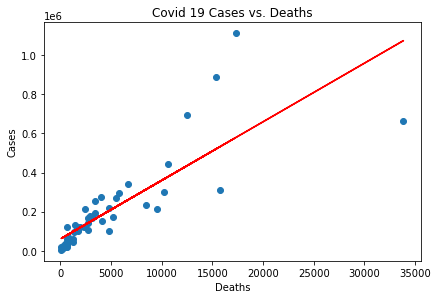

The r-value is: 0.6600119948260404


In [9]:
x_axis=summary_stats_df["Deaths"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Deaths")
plt.xlabel("Deaths")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [ ]:
# There is a high correlation in the number of Covid 19 Cases to the number of Deaths. This means that there is a direct
# impact to the number of deaths as a result of Covid 19 infection cases.
# Based on the data, we can claim that there is a positive correlation between Cases vs. Deaths
# Further analysis will help to determine if there is covid impact/affect on anxiety (mental health).

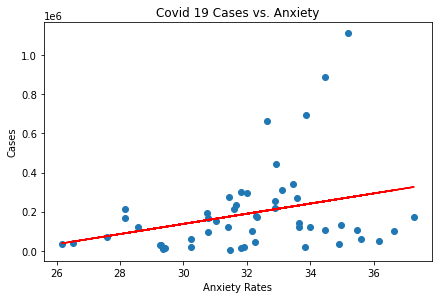

The r-value is: 0.08838834660185807


In [10]:
x_axis=summary_stats_df["Anxiety"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Anxiety")
plt.xlabel("Anxiety Rates")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [ ]:
# There is correlation between Covid 19 Cases vs. Anxiety (Mental Disorder) but not high as the number of Deaths. This means that there is a direct
# impact to Anxiety (Mental Disorder) as a result of Covid 19 infection cases.
# Based on the data, we can claim that there is a positive correlation  of Covid 19 Cases vs. Anxiety (Mental Disorder).

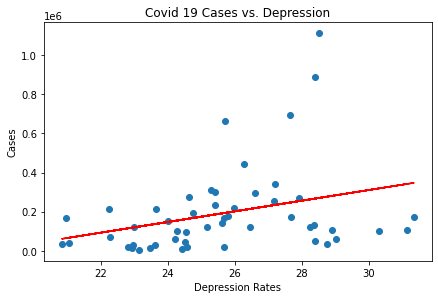

The r-value is: 0.09828985333616586


In [17]:
x_axis=summary_stats_df["Depression"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Depression")
plt.xlabel("Depression Rates")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

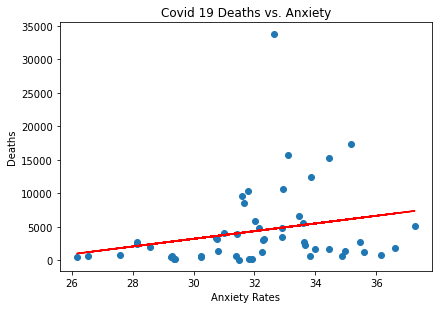

The r-value is: 0.058543384108705694


In [11]:
x_axis=summary_stats_df["Anxiety"]
y_axis=summary_stats_df["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Deaths vs. Anxiety")
plt.xlabel("Anxiety Rates")
plt.ylabel("Deaths")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [ ]:
# There is correlation between Covid 19 Deaths vs. Anxiety (Mental Disorder) but this is lower than when compared to the number of Cases. 
# There is an impact/affect to Anxiety (Mental Disorder) as a result of Covid 19 infection deaths.
# We can determine that there is positive correlation  of Covid 19 Cases vs. Anxiety (Mental Disorder) based on the data.

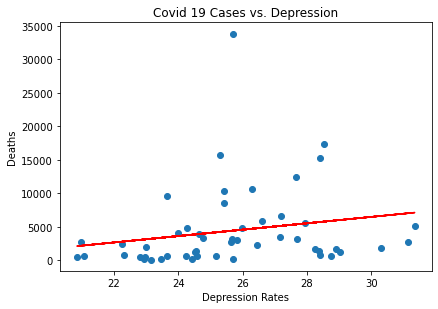

The r-value is: 0.04093693682134642


In [18]:
x_axis=summary_stats_df["Depression"]
y_axis=summary_stats_df["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Depression")
plt.xlabel("Depression Rates")
plt.ylabel("Deaths")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [14]:
#In 2019, the CDC reported that about 18.5 percent of US adults expired symptoms of depression. We are
#using 18.5% as our null hypothesis to test whether the there has been a mathmatically significant change 
#in depression rates during the pandemic.

M_new=summary_stats_df['Depression'].mean()
M_old=18.5
stan_dev=summary_stats_df['Depression'].std()
n=summary_stats_df['Depression'].count()

print('Ho:' + str(round(M_new,2)) + '<=' + str(M_old))
print('H1:' + str(round(M_new,2)) + '>' + str(M_old))

significance_level = .05

z_score=(M_new-M_old)/(stan_dev)


print('The z-score equals '+str(round(z_score,3)))
print('The significance level equals '+str(significance_level))
p=st.norm.cdf(z_score)
print('The p-value equals '+str(round(1-p,3)))
print('Because the p-value '+str(round(1-p,3))+ ' is less than the significance level, we have significant evidence to reject the null hypothesis.')
print('With this analysis, we can say with '+str(1-significance_level)+' confidence that depression rates for Americans have been higher during the pandemic.')

Ho:25.63<=18.5
H1:25.63>18.5
The z-score equals 2.795
The significance level equals 0.05
The p-value equals 0.003
Because the p-value 0.003 is less than the significance level, we have significant evidence to reject the null hypothesis.
With this analysis, we can say with 0.95 confidence that depression rates for Americans have been higher during the pandemic.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C60874908>]],
      dtype=object)

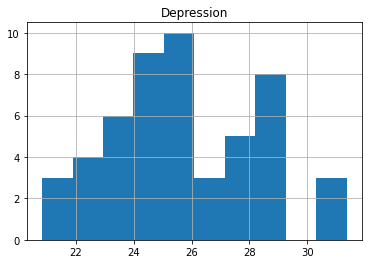

In [19]:
summary_stats_df.hist(column='Depression')
